In [2]:
# Importing required libraries

# Library for data cleaning and data manipulation
import pandas as pd
import numpy as np

# Library for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd

# Library for normality test
import scipy.stats as stats

# Library for text analysis
import re
from collections import Counter
import string

# Other libraries
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Airbnb Listings Bangkok_clean.csv")

### **2. Seasonal Trends and Pricing Analysis**

To analyze seasonal trends and pricing, the **'last_review'** column, which records the most recent date when a guest reviewed a property, is utilized. By converting this column to a datetime format, the month and year of each listing's last review are extracted. This approach provides insights into recent guest interactions and helps identify patterns in booking behavior across different times of the year.

By grouping the data by month, the analysis includes the average price, total number of reviews, and availability trends on a monthly basis. This method is particularly useful for understanding the seasonality of demand, as it reflects the most current guest activity, making it possible to identify peak booking periods and adjust pricing and availability strategies accordingly.

**HOWEVER**, it is important to note that this analysis focuses on recent trends and may not capture the full range of seasonal patterns, especially if some listings have fewer reviews or sporadic guest interactions.

In [4]:
# Convert the last_review column to datetime format
df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce")

# Filter out rows where last_review is the default date
df_filtered = df[df["last_review"] != pd.Timestamp("1970-01-01")]

# Extract the month and year from the last review date for analysis
df_filtered["review_month"] = df_filtered["last_review"].dt.month
df_filtered["review_year"] = df_filtered["last_review"].dt.year

# Group by month and calculate the average price and the number of reviews per month
monthly_trends = df_filtered.groupby("review_month").agg(
    avg_price=("price", "mean"),
    total_reviews=("number_of_reviews", "sum"),
    avg_availability=("availability_365", "mean")
).reset_index()

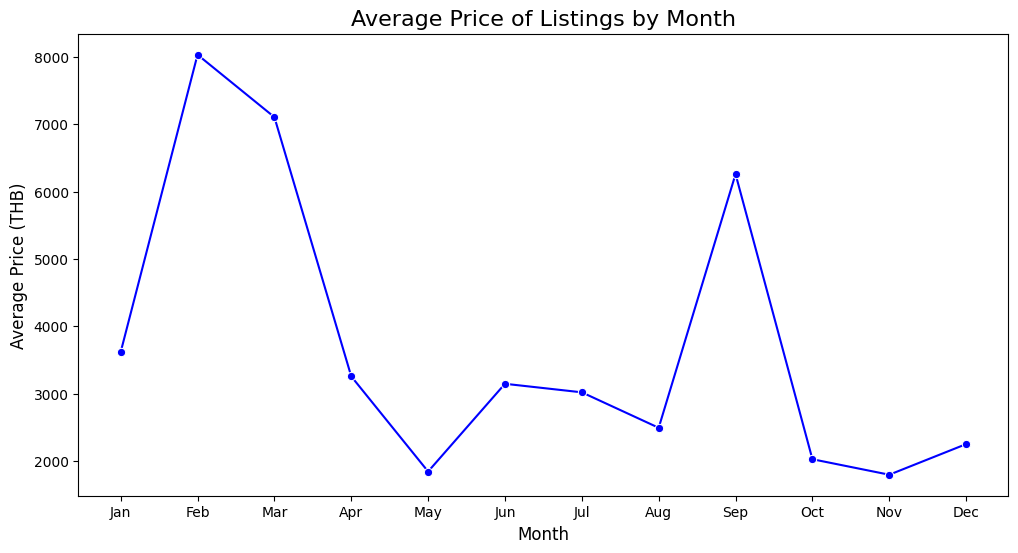

In [6]:
# Average Price by Month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends, x="review_month", y="avg_price", marker="o", color="blue")
plt.title("Average Price of Listings by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Price (THB)", fontsize=12)
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

The graph shows how the average price of listings fluctuates throughout the year. Prices tend to peak during certain months, likely due to increased demand during tourist seasons or holidays. Understanding these trends allows hosts to implement dynamic pricing strategies, adjusting prices based on expected demand to maximize revenue.

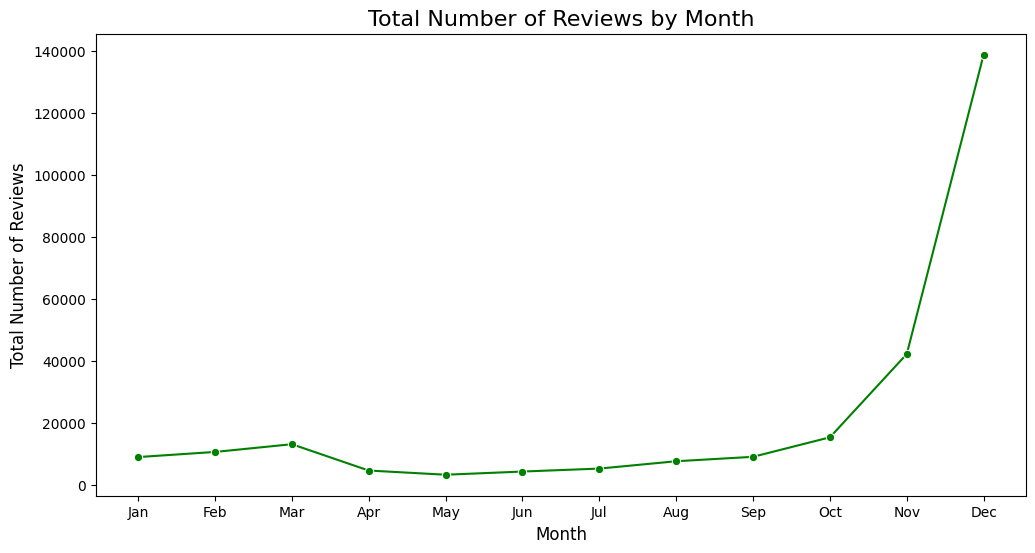

In [7]:
# Number of Reviews by Month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends, x="review_month", y="total_reviews", marker="o", color="green")
plt.title("Total Number of Reviews by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Number of Reviews", fontsize=12)
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

The graph illustrates the total number of reviews per month, serving as a proxy for occupancy or booking activity. Months with higher review counts indicate periods of increased guest activity, which could correlate with peak tourism seasons. Marketing campaigns should be intensified during these high-activity months to attract more bookings, while promotions or discounts could be offered during off-peak periods to boost occupancy.

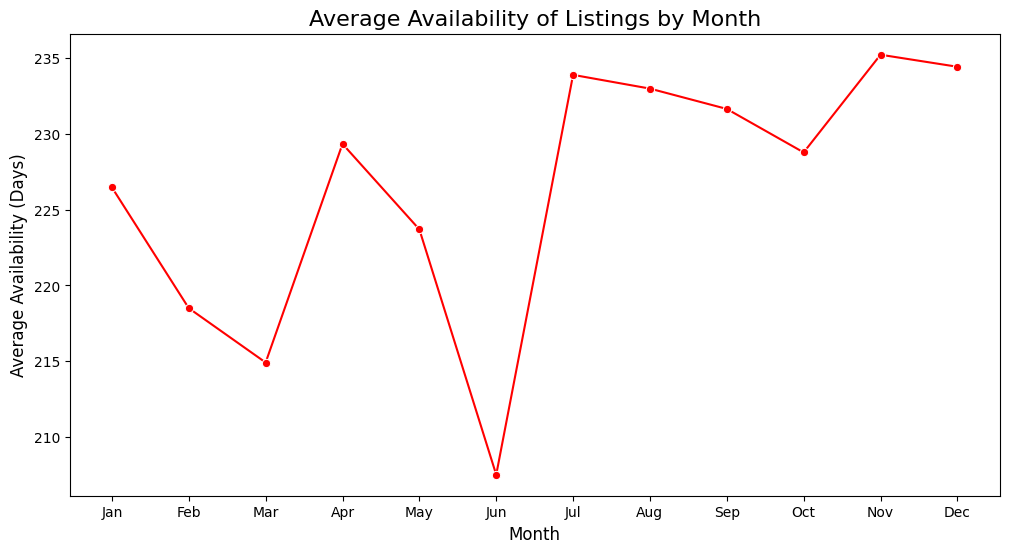

In [8]:
# Average Availability by Month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends, x="review_month", y="avg_availability", marker="o", color="red")
plt.title("Average Availability of Listings by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Availability (Days)", fontsize=12)
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

The graph shows the average availability of listings throughout the year. Lower availability in certain months suggests higher booking rates, likely due to seasonal demand. Hosts should consider adjusting their availability settings, such as minimum stay requirements, to capitalize on these high-demand periods.

#### **Strategic Implications**

Seasonality plays a significant role in shaping the dynamics of Airbnb listings in Bangkok, influencing pricing, occupancy rates, and availability. The impact can be summarized as follows:

1. **Pricing Fluctuations**:
   - **Observation**: The average price of listings varies throughout the year, with noticeable peaks during certain months. These peaks likely correspond to periods of high tourist demand, such as holidays or festivals.
   - **Impact**: Hosts can maximize revenue by adjusting their prices during peak seasons. However, during off-peak months, lower prices might be necessary to maintain competitiveness and attract bookings.

2. **Occupancy and Booking Activity**:
   - **Observation**: The total number of reviews, which can be used as a proxy for occupancy, also fluctuates seasonally. High review counts in certain months indicate increased booking activity, likely aligning with tourist seasons.
   - **Impact**: During months with higher occupancy, hosts may not need to offer discounts or promotions, as demand naturally drives bookings. Conversely, in slower months, targeted marketing efforts and special offers may be required to fill vacancies and maintain steady cash flow.

3. **Availability**:
   - **Observation**: The availability of listings tends to decrease during high-demand months, suggesting that many properties are fully booked during these periods.
   - **Impact**: In high-demand months, hosts can implement stricter booking policies, such as longer minimum stays, to optimize their occupancy and income. Conversely, in low-demand periods, loosening these restrictions can make a listing more attractive to potential guests.

#### **Strategic Recommendations**

1. **Dynamic Pricing**: Implement a dynamic pricing strategy that adjusts rates based on expected seasonal demand. This can help maximize revenue during peak seasons while remaining competitive during slower periods.

2. **Targeted Marketing**: Align marketing campaigns with seasonal trends, focusing on high-traffic months to capture more bookings. In off-peak periods, consider promotions or discounts to stimulate demand.

3. **Adjusting Availability**: Consider adjusting availability settings, such as minimum night stays, to align with seasonal demand patterns. During high-demand months, stricter policies can help optimize revenue, while more flexible policies in off-peak months can attract bookings that might otherwise be lost.

#### **Conclusion**

Seasonality significantly impacts the Airbnb market in Bangkok, affecting how hosts should price, market, and manage their listings. By understanding and adapting to these seasonal trends, hosts can optimize their strategies to ensure higher occupancy rates, maximize revenue, and maintain a competitive edge throughout the year.

Please refer to the next file for continued analysis.